In [45]:
import pandas as pd
import numpy as np

In [46]:
df=pd.read_csv('Churn_Modelling.csv')

In [47]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
df.drop(columns=['RowNumber','CustomerId'],inplace=True)

In [49]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [51]:
df.duplicated().sum()#check the number of rows

np.int64(0)

In [52]:
df['Exited'].value_counts()#see the total number of exited counts

Exited
0    7963
1    2037
Name: count, dtype: int64

In [53]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [54]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [55]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [56]:
df.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [57]:
df.drop(columns=['Surname'],inplace=True)

In [58]:
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [59]:
X=df.drop(columns=['Exited'])
y=df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [60]:
X_train.shape

(7000, 11)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

In [62]:
X_train_scaled

array([[-0.57558225, -1.79667873, -0.34947397, ..., -0.57823004,
        -0.57888987,  0.90036493],
       [ 0.39818245,  2.26982524, -1.38692851, ..., -0.57823004,
         1.72744428, -1.11066076],
       [ 1.69308232, -0.75641027, -1.38692851, ..., -0.57823004,
        -0.57888987,  0.90036493],
       ...,
       [ 0.17028007, -0.18899111,  1.37961693, ..., -0.57823004,
        -0.57888987, -1.11066076],
       [ 0.37746405, -0.37813083,  1.03379875, ..., -0.57823004,
         1.72744428,  0.90036493],
       [ 1.56877193,  1.13498693,  0.68798057, ..., -0.57823004,
         1.72744428,  0.90036493]])

In [63]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [64]:
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(loss='binary_crossentropy',optimizer='Adam')
model.fit(X_train_scaled,y_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 0.5425


In [67]:
X_test_scaled=scaler.transform(X_test)

In [68]:
model.layers[0].get_weights()

[array([[-0.30902743,  0.2789903 ,  0.34934497],
        [-0.1445663 , -0.17335296,  0.06346153],
        [ 0.02271142, -0.18889503, -0.27215713],
        [-0.3579985 ,  0.20620492, -0.3325892 ],
        [-0.35678858,  0.43128756,  0.22627999],
        [-0.54092574, -0.26538536, -0.24204613],
        [ 0.42835653, -0.50668657,  0.32776788],
        [ 0.630536  , -0.19677536, -0.26082385],
        [ 0.00533223, -0.4904942 , -0.6060679 ],
        [-0.04522991, -0.51456577,  0.33558527],
        [ 0.12574331, -0.38611895,  0.21309824]], dtype=float32),
 array([ 0.21737893, -0.15129697,  0.17546363], dtype=float32)]

In [69]:
y_log=model.predict(X_test_scaled)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step


In [70]:
y_pred=np.where(y_log>0.5,1,0)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7963333333333333

In [72]:
'''To imporve the model we can change the model'''
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [75]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7538 - loss: 0.5557 - val_accuracy: 0.7921 - val_loss: 0.4990
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7973 - loss: 0.4763 - val_accuracy: 0.7921 - val_loss: 0.4621
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7986 - loss: 0.4506 - val_accuracy: 0.8000 - val_loss: 0.4423
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8039 - loss: 0.4353 - val_accuracy: 0.8071 - val_loss: 0.4291
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8109 - loss: 0.4219 - val_accuracy: 0.8121 - val_loss: 0.4183
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8161 - loss: 0.4083 - val_accuracy: 0.8193 - val_loss: 0.4063
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8243 - loss: 0.3960 - val_accuracy: 0.8250 - val_loss: 0.3956
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8332 - loss: 0.3853 - val_accu

In [76]:
'''Here the accuracy incresed but corss val was low leading to overfitting'''

'Here the accuracy incresed but corss val was low leading to overfitting'

In [77]:
import matplotlib.pyplot as plt
history.history

{'accuracy': [0.7537500262260437,
  0.7973214387893677,
  0.7985714077949524,
  0.803928554058075,
  0.8108928799629211,
  0.8160714507102966,
  0.8242856860160828,
  0.833214282989502,
  0.8451785445213318,
  0.8467857241630554,
  0.8469642996788025,
  0.8491071462631226,
  0.8514285683631897,
  0.8510714173316956,
  0.8535714149475098,
  0.8558928370475769,
  0.8555356860160828,
  0.8591071367263794,
  0.8575000166893005,
  0.8580357432365417,
  0.8585714101791382,
  0.8587499856948853,
  0.8607142567634583,
  0.8580357432365417,
  0.8587499856948853,
  0.8596428632736206,
  0.8600000143051147,
  0.8616071343421936,
  0.8596428632736206,
  0.8591071367263794,
  0.8610714077949524,
  0.8600000143051147,
  0.8616071343421936,
  0.8608928322792053,
  0.8600000143051147,
  0.8596428632736206,
  0.8614285588264465,
  0.8619642853736877,
  0.8619642853736877,
  0.8608928322792053,
  0.8614285588264465,
  0.8630357384681702,
  0.8623214364051819,
  0.8619642853736877,
  0.862500011920929,
 

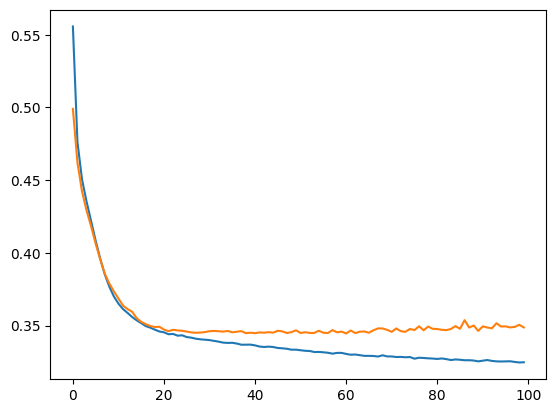

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

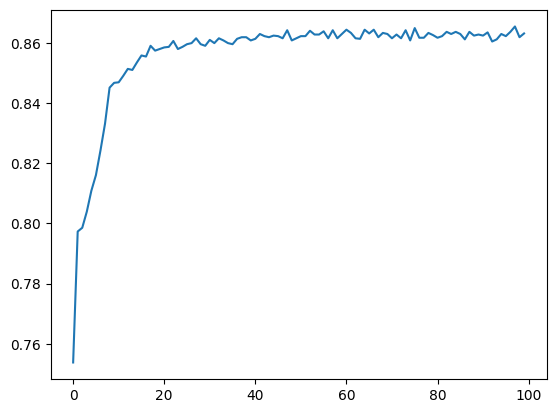

In [79]:
plt.plot(history.history['accuracy'])